In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:
girl = np.loadtxt('girl.txt',dtype=int)
boy = np.loadtxt('boy.txt',dtype=int)

In [18]:
print(boy.shape )
print(girl.shape)

(165, 3)
(77, 3)


In [9]:
boyY = np.zeros(165)

In [13]:
girlY = np.ones(girl.shape[0])

In [32]:
Y = np.hstack((boyY, girlY))
X = np.vstack((boy, girl))

In [33]:
print(Y.shape)

(242,)


Text(0,0.5,'weight')

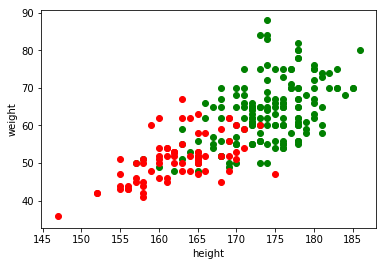

In [35]:
plt.scatter(X[Y==0,0],
            X[Y==0,1],color="g")
plt.scatter(X[Y==1,0],X[Y==1,1],color="r")
plt.xlabel("height")
plt.ylabel("weight")

Text(0,0.5,'size of feet')

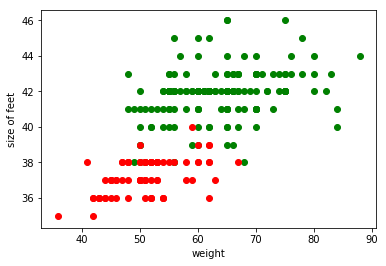

In [37]:
plt.scatter(X[Y==0,1],
            X[Y==0,2],color="g")
plt.scatter(X[Y==1,1],X[Y==1,2],color="r")
plt.xlabel("weight")
plt.ylabel("size of feet")

Text(0,0.5,'size of feet')

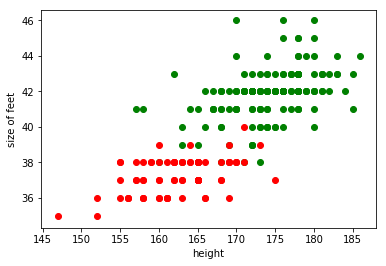

In [38]:
plt.scatter(X[Y==0,0],
            X[Y==0,2],color="g")
plt.scatter(X[Y==1,0],X[Y==1,2],color="r")
plt.xlabel("height")
plt.ylabel("size of feet")